In [1]:
import utilities as ut
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def print_image(image,title= None):
    plt.figure(figsize=[10,8])
    plt.suptitle(title)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

def perspective_change(image):
    rows, cols, colors = image.shape
    M = np.float32([[1,   0, 0], [0.5, 1, 0], [0,0, 1]])
    sheared_img = cv2.warpPerspective(image, M, (int(cols*1.5), int(rows*1.5)), borderMode=cv2.BORDER_CONSTANT, borderValue=[255,255,255])
    return sheared_img



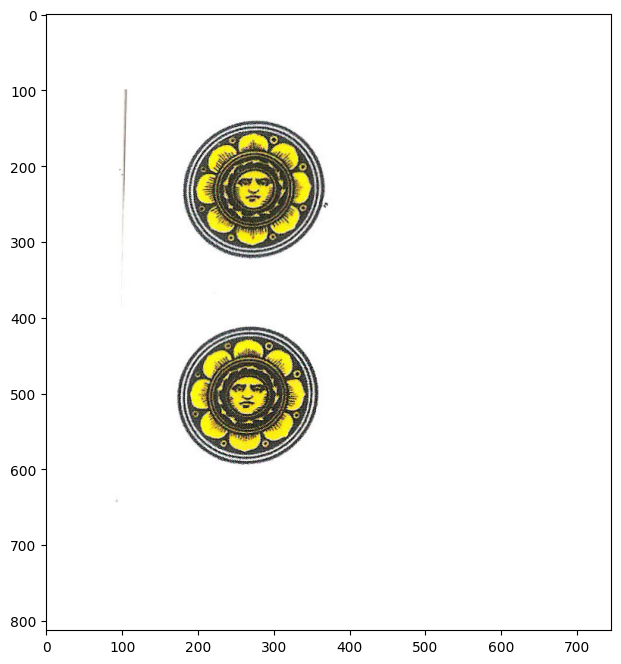

In [2]:
def ran_numb():
    return np.random.uniform(low=0,high=0.04)-0.02

def perspective_change_personalized(image,rand_seed=1):
    random.seed(5)
    old_image_height, old_image_width, channels = image.shape

    # create new image of desired size and color (blue) for padding
    new_image_width = int(old_image_width+200)
    new_image_height = int(old_image_height+200)
    color = (255,255,255)
    result = np.full((new_image_height,new_image_width, channels), color, dtype=np.uint8)

    # compute center offset
    x_center = (new_image_width - old_image_width) // 2
    y_center = (new_image_height - old_image_height) // 2

    # copy img image into center of result image
    result[y_center:y_center+old_image_height, 
        x_center:x_center+old_image_width] = image

    M = np.float32([[1+ran_numb(), 0+ran_numb(), 0+ran_numb()], [0+ran_numb(), 1+ran_numb(), 0+ran_numb()], [0,0, 1+ran_numb()]])#    M = np.float32([[1.1,   -0.1, 0.1], [0.1, 1.1, 0.1], [0,0, 1.1]])
    sheared_img = cv2.warpPerspective(result, M, (int(result.shape[0]*1), int(result.shape[1]*1.5)), borderMode=cv2.BORDER_CONSTANT, borderValue=[255,255,255])
    return sheared_img

print_image(perspective_change_personalized(cv2.imread("Images/Cards/2O.jpg")))

In [3]:
workingDirectory = "./workingDirectory/"
newDatasetDirectory="Images/WarpedCards/"
images_paths = ut.images_paths("Images/Cards/")


In [6]:
for i in range(1,25):
    for path in images_paths:
        label_properties = ut.label_class_only(path)
        image = cv2.imread(path)
        image = perspective_change_personalized(image,i)
        x= label_properties["value"]
        y = label_properties["seed"]
        z= label_properties["label"]
        cv2.imwrite(f"{newDatasetDirectory}{x}{y}-{z}-{i}.jpg",image)

: 

In [5]:
for path in ut.images_paths(newDatasetDirectory):
    label_properties = ut.label_properties_generated(path)
    image = cv2.imread(path)
    binary_image, contours = ut.preprocess_image(image)
    print(contours[0])
    cv2.drawContours(image, contours[0], -1, (0, 255, 0), 2)  
    x= label_properties["value"]
    y = label_properties["seed"]
    z= label_properties["label"]
    i= label_properties["index"]
    cv2.imwrite(f"{workingDirectory}{x}{y}-{z}-{i}.jpg",image)